In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('heartdisease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
pd.isna(df).sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

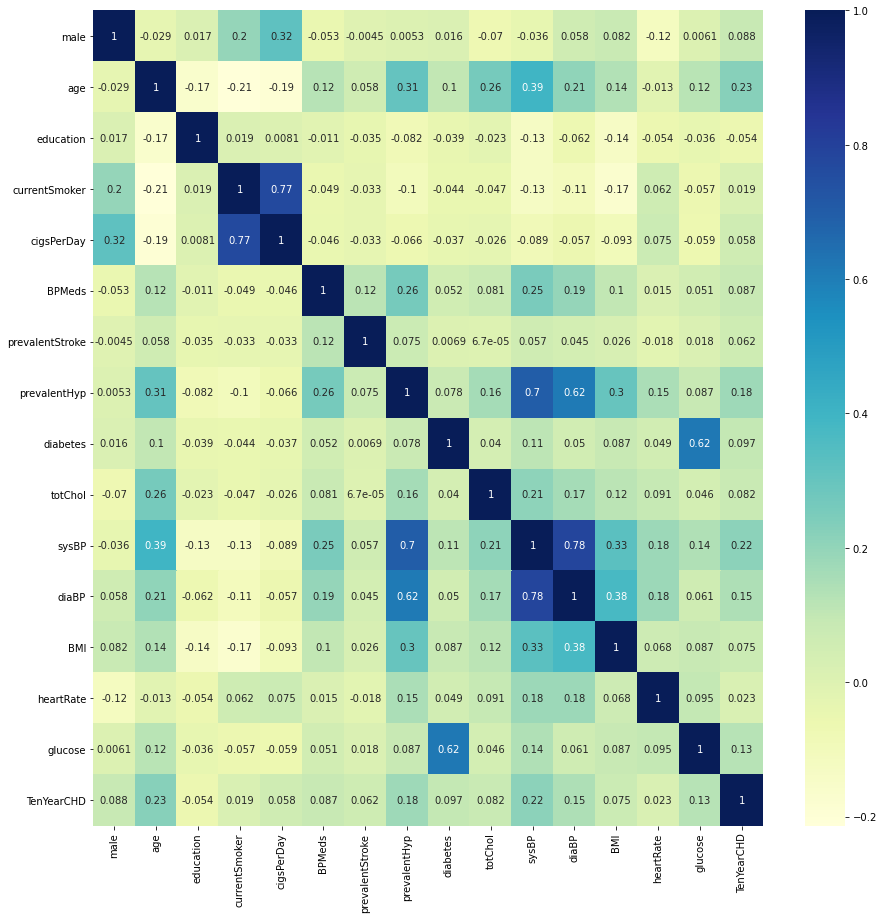

In [4]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
# --> CHECKING CORRELATION

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

data = df[['age','prevalentHyp','sysBP','diaBP']]
y = df['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.35,random_state=35)

model.fit(x_train,y_train)

predicted = model.predict(x_test)

In [6]:
from sklearn.metrics import accuracy_score,classification_report

accuracy_score(y_test,predicted)
#--> ACCURACY

0.8524258760107817

In [7]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1263
           1       0.56      0.04      0.08       221

    accuracy                           0.85      1484
   macro avg       0.71      0.52      0.50      1484
weighted avg       0.81      0.85      0.79      1484

